In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split 
from sklearn import metrics 
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.neural_network import MLPRegressor
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

In [2]:
file = 'Sleep_Efficiency.csv'
data_df = pd.read_csv(file)

data_df.set_index('ID',inplace=True)
data_df

,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
ID,,,,,,,,,,,,,,
1,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,12,0.0,0.0,0.0,Yes,3.0
2,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,19,28,53,3.0,0.0,3.0,Yes,3.0
3,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0
4,40,Female,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,23,25,52,3.0,50.0,5.0,Yes,1.0
5,57,Male,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76,27,55,18,3.0,0.0,3.0,No,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
448,27,Female,2021-11-13 22:00:00,2021-11-13 05:30:00,7.5,0.91,22,57,21,0.0,0.0,0.0,No,5.0
449,52,Male,2021-03-31 21:00:00,2021-03-31 03:00:00,6.0,0.74,28,57,15,4.0,25.0,0.0,No,3.0
450,40,Female,2021-09-07 23:00:00,2021-09-07 07:30:00,8.5,0.55,20,32,48,1.0,NaN,3.0,Yes,0.0


In [3]:
data_num_df = data_df

data_num_df['Gender'] = data_df['Gender'].replace({'Male': 1, 'Female': 0})

data_num_df['Smoking status'] = data_df['Smoking status'].replace({'Yes': 1, 'No': 0})

data_num_df['Bedtime'] = pd.to_datetime(data_df['Bedtime'])
data_num_df['Wakeup time'] = pd.to_datetime(data_df['Wakeup time'])

data_num_df['Bedtime'] = data_num_df['Bedtime'].apply(lambda x: x.hour + x.minute / 60.0)
data_num_df['Wakeup time'] = data_num_df['Wakeup time'].apply(lambda x: x.hour + x.minute / 60.0)


data_num_nulled = data_num_df.fillna(0)

data_num_cleaned = data_num_df.dropna()

data_num_cleaned


C:\Users\andra\AppData\Local\Temp\ipykernel_6208\3723832443.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_num_df['Gender'] = data_df['Gender'].replace({'Male': 1, 'Female': 0})
C:\Users\andra\AppData\Local\Temp\ipykernel_6208\3723832443.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_num_df['Smoking status'] = data_df['Smoking status'].replace({'Yes': 1, 'No': 0})


,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
ID,,,,,,,,,,,,,,
1,65,0,1.0,7.0,6.0,0.88,18,70,12,0.0,0.0,0.0,1,3.0
2,69,1,2.0,9.0,7.0,0.66,19,28,53,3.0,0.0,3.0,1,3.0
3,40,0,21.5,5.5,8.0,0.89,20,70,10,1.0,0.0,0.0,0,3.0
4,40,0,2.5,8.5,6.0,0.51,23,25,52,3.0,50.0,5.0,1,1.0
5,57,1,1.0,9.0,8.0,0.76,27,55,18,3.0,0.0,3.0,0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
446,30,0,23.0,6.5,7.5,0.53,28,20,52,4.0,50.0,2.0,1,1.0
448,27,0,22.0,5.5,7.5,0.91,22,57,21,0.0,0.0,0.0,0,5.0
449,52,1,21.0,3.0,6.0,0.74,28,57,15,4.0,25.0,0.0,0,3.0


In [4]:
scaler = StandardScaler()

numerical_columns = ['Age', 'Bedtime', 'Wakeup time', 'Sleep duration', 
                     'REM sleep percentage', 'Deep sleep percentage', 'Light sleep percentage', 
                     'Awakenings', 'Caffeine consumption', 'Alcohol consumption', 
                     'Exercise frequency']

data_num_cleaned[numerical_columns] = scaler.fit_transform(data_num_cleaned[numerical_columns])
data_num_cleaned

C:\Users\andra\AppData\Local\Temp\ipykernel_6208\336989720.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_num_cleaned[numerical_columns] = scaler.fit_transform(data_num_cleaned[numerical_columns])


,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
ID,,,,,,,,,,,,,,
1,1.805639,0,-0.925225,-0.053656,-1.644520,0.88,-1.366110,1.104582,-0.817365,-1.195204,-0.783159,-0.712049,1,0.859132
2,2.104460,1,-0.830117,0.949643,-0.511174,0.66,-1.074232,-1.596133,1.864145,1.020111,-0.783159,1.150480,1,0.859132
3,-0.061998,0,1.024501,-0.806130,0.622172,0.89,-0.782354,1.104582,-0.948170,-0.456766,-0.783159,-0.712049,0,0.859132
4,-0.061998,0,-0.782562,0.698818,-1.644520,0.51,0.093281,-1.789041,1.798742,1.020111,0.943350,2.392165,1,-0.524035
5,1.207995,1,-0.925225,0.949643,0.622172,0.76,1.260793,0.140041,-0.424949,1.020111,-0.783159,1.150480,0,0.859132
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
446,-0.809052,0,1.167164,-0.304480,0.055499,0.53,1.552672,-2.110555,1.798742,1.758549,0.943350,0.529637,1,-0.524035
448,-1.033169,0,1.072055,-0.806130,0.055499,0.91,-0.198598,0.268646,-0.228741,-1.195204,-0.783159,-0.712049,0,2.242300
449,0.834468,1,0.976947,-2.060253,-1.644520,0.74,1.552672,0.268646,-0.621157,1.758549,0.080096,-0.712049,0,0.859132


In [5]:
X = data_num_cleaned.drop('Sleep efficiency', axis=1)
Y = data_num_cleaned['Sleep efficiency']

In [6]:
X

,Age,Gender,Bedtime,Wakeup time,Sleep duration,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
ID,,,,,,,,,,,,,
1,1.805639,0,-0.925225,-0.053656,-1.644520,-1.366110,1.104582,-0.817365,-1.195204,-0.783159,-0.712049,1,0.859132
2,2.104460,1,-0.830117,0.949643,-0.511174,-1.074232,-1.596133,1.864145,1.020111,-0.783159,1.150480,1,0.859132
3,-0.061998,0,1.024501,-0.806130,0.622172,-0.782354,1.104582,-0.948170,-0.456766,-0.783159,-0.712049,0,0.859132
4,-0.061998,0,-0.782562,0.698818,-1.644520,0.093281,-1.789041,1.798742,1.020111,0.943350,2.392165,1,-0.524035
5,1.207995,1,-0.925225,0.949643,0.622172,1.260793,0.140041,-0.424949,1.020111,-0.783159,1.150480,0,0.859132
...,...,...,...,...,...,...,...,...,...,...,...,...,...
446,-0.809052,0,1.167164,-0.304480,0.055499,1.552672,-2.110555,1.798742,1.758549,0.943350,0.529637,1,-0.524035
448,-1.033169,0,1.072055,-0.806130,0.055499,-0.198598,0.268646,-0.228741,-1.195204,-0.783159,-0.712049,0,2.242300
449,0.834468,1,0.976947,-2.060253,-1.644520,1.552672,0.268646,-0.621157,1.758549,0.080096,-0.712049,0,0.859132


In [7]:
Y

ID
1      0.88
2      0.66
3      0.89
4      0.51
5      0.76
       ... 
446    0.53
448    0.91
449    0.74
451    0.76
452    0.63
Name: Sleep efficiency, Length: 388, dtype: float64

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=32)

mlp_model = MLPRegressor(hidden_layer_sizes=(50, 50), max_iter=1000, random_state=32)
mlp_model.fit(X_train, Y_train)

Y_pred = mlp_model.predict(X_test)

In [9]:
mean_ae = metrics.mean_absolute_error(Y_test, Y_pred)
print('Atlagos abszolut hiba: ', mean_ae)

mse = metrics.mean_squared_error(Y_test, Y_pred)
print('Atlagos negyzetes hiba: ', mse)

r2 = metrics.r2_score(Y_test, Y_pred)
print('R² Score: ', r2)

max_error = metrics.max_error(Y_test, Y_pred)
print('Max hiba: ', max_error)

median_ae = metrics.median_absolute_error(Y_test, Y_pred)
print('Median abszolut hiba: ', median_ae)

Atlagos abszolut hiba:  0.08128937690418166
Atlagos negyzetes hiba:  0.009933541864038282
R² Score:  0.3222117320412611
Max hiba:  0.24748584813934238
Median abszolut hiba:  0.06755933373530662


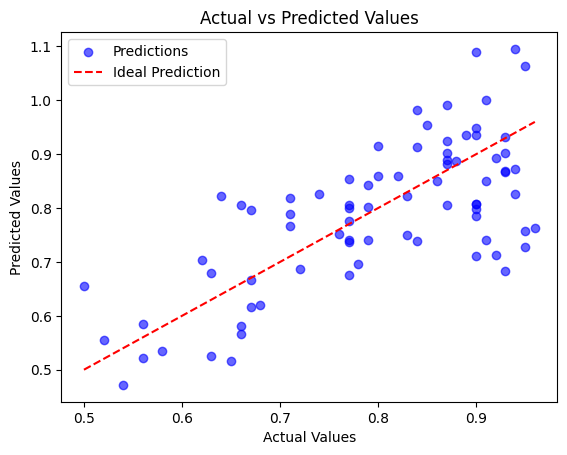

In [10]:
plt.scatter(Y_test, Y_pred, color='blue', label='Predictions', alpha=0.6)
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], color='red', label='Ideal Prediction', linestyle='--')
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

Kiertekeles:
-A modell eleg gyengen szerepel. Sok elteres, viszont az elteresek merteke nem magas a legtobb esetben.

A modellt megropaltam finomhangolni a hipermarameterek megvaltoztatasaval es amilyen ertekek maradtak azok bizonyultak a leghatekonyabbnak a 
kiprobaltak kozul

In [ ]:
param_grid = {
    'hidden_layer_sizes': [(50, 50), (100,100), (100, 50, 25)],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate_init': [0.001, 0.0005, 0.0001],
    'activation':['tanh', 'relu', 'logistic']
}

grid_search = GridSearchCV(MLPRegressor(max_iter=1000, random_state=32), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, Y_train)

print("Legjobb paraméterek:", grid_search.best_params_)


Atlagos abszolut hiba:  0.05606439598408672
Atlagos negyzetes hiba:  0.004663106326586623
R² Score:  0.6818255961806853
Max hiba:  0.148119771073841
Median abszolut hiba:  0.05157882645631373


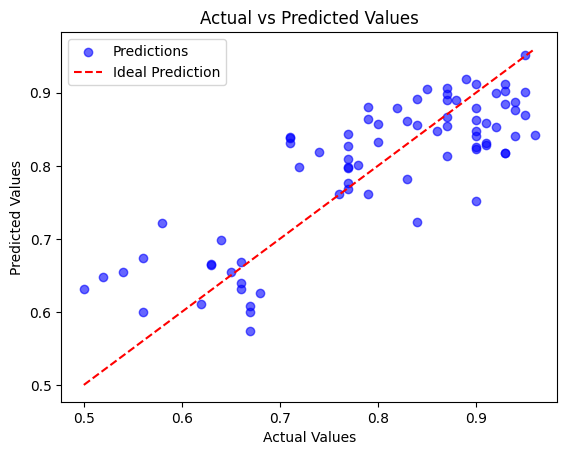

In [12]:
mlp_model_changed = MLPRegressor(hidden_layer_sizes=(100, 100), max_iter=1000, random_state=30,activation='logistic', learning_rate_init=0.001, alpha=0.0001)
mlp_model_changed.fit(X_train, Y_train)
Y_pred_changed = mlp_model_changed.predict(X_test)




mean_ae_changed = metrics.mean_absolute_error(Y_test, Y_pred_changed)
print('Atlagos abszolut hiba: ', mean_ae_changed)

mse_changed = metrics.mean_squared_error(Y_test, Y_pred_changed)
print('Atlagos negyzetes hiba: ', mse_changed)

r2_changed = metrics.r2_score(Y_test, Y_pred_changed)
print('R² Score: ', r2_changed)

max_error_changed = metrics.max_error(Y_test, Y_pred_changed)
print('Max hiba: ', max_error_changed)

median_ae_changed = metrics.median_absolute_error(Y_test, Y_pred_changed)
print('Median abszolut hiba: ', median_ae_changed)




plt.scatter(Y_test, Y_pred_changed, color='blue', label='Predictions', alpha=0.6)
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], color='red', label='Ideal Prediction', linestyle='--')
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()


A modell a hiperparameterek megvaltoztatasa utan joval jobban teljesit az elozo beallitasoknal

In [13]:
correlation_matrix = data_num_cleaned.corr()
print(correlation_matrix['Sleep efficiency'].sort_values(ascending=False))

Sleep efficiency          1.000000
Deep sleep percentage     0.789087
Exercise frequency        0.266050
Bedtime                   0.162317
Age                       0.124093
Caffeine consumption      0.070804
REM sleep percentage      0.064038
Gender                   -0.008177
Sleep duration           -0.019164
Wakeup time              -0.153720
Smoking status           -0.292898
Alcohol consumption      -0.397012
Awakenings               -0.567885
Light sleep percentage   -0.816934
Name: Sleep efficiency, dtype: float64


In [14]:
X_train_trimmed = X_train.drop('Gender', axis=1)
X_train_trimmed = X_train_trimmed.drop('Sleep duration', axis=1)
X_train_trimmed = X_train.drop('REM sleep percentage', axis=1)
X_train_trimmed = X_train_trimmed.drop('Caffeine consumption', axis=1)

X_test_trimmed = X_test.drop('Gender', axis=1)
X_test_trimmed = X_test_trimmed.drop('Sleep duration', axis=1)
X_test_trimmed = X_test.drop('REM sleep percentage', axis=1)
X_test_trimmed = X_test_trimmed.drop('Caffeine consumption', axis=1)

In [15]:
param_grid = {
    'hidden_layer_sizes': [(50, 50), (100,100), (100, 50, 25), (50, 100, 50), (100,)],
    'alpha': [0.0001, 0.001, 0.01, 0.05, 0.005],
    'learning_rate_init': [0.001, 0.0005, 0.0001, 0.005],
    'activation':['tanh', 'relu', 'logistic'],
    'batch_size':[198, 200, 202]
}

grid_search = GridSearchCV(MLPRegressor(max_iter=1000, random_state=35), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_trimmed, Y_train)

print("Legjobb paraméterek:", grid_search.best_params_)


Legjobb paraméterek: {'activation': 'tanh', 'alpha': 0.05, 'batch_size': 200, 'hidden_layer_sizes': (100, 50, 25), 'learning_rate_init': 0.005}


Atlagos abszolut hiba:  0.044592151875415396
Atlagos negyzetes hiba:  0.003283677683309877
R² Score:  0.7759471656768578
Max hiba:  0.18036235366591458
Median abszolut hiba:  0.04225107794294297


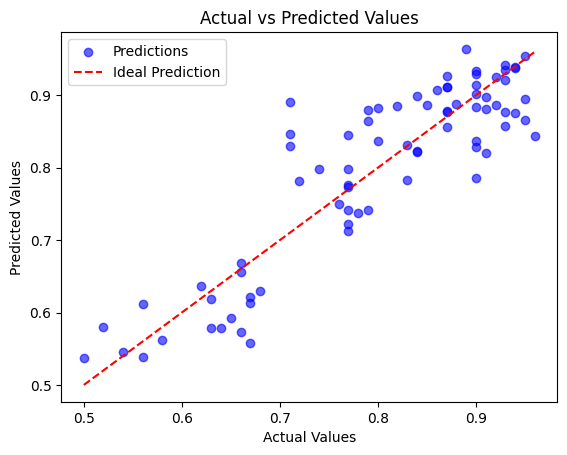

In [16]:
mlp_model_03 = MLPRegressor(hidden_layer_sizes=(100, 50, 25), max_iter=1000, random_state=35,activation='tanh', learning_rate_init=0.005, alpha=0.05, batch_size=200)

mlp_model_03.fit(X_train_trimmed, Y_train)

Y_pred_03 = mlp_model_03.predict(X_test_trimmed)

mean_ae_03 = metrics.mean_absolute_error(Y_test, Y_pred_03)
print('Atlagos abszolut hiba: ', mean_ae_03)

mse_03 = metrics.mean_squared_error(Y_test, Y_pred_03)
print('Atlagos negyzetes hiba: ', mse_03)

r2_03 = metrics.r2_score(Y_test, Y_pred_03)
print('R² Score: ', r2_03)

max_error_03 = metrics.max_error(Y_test, Y_pred_03)
print('Max hiba: ', max_error_03)

median_ae_03 = metrics.median_absolute_error(Y_test, Y_pred_03)
print('Median abszolut hiba: ', median_ae_03)

plt.scatter(Y_test, Y_pred_03, color='blue', label='Predictions', alpha=0.6)
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], color='red', label='Ideal Prediction', linestyle='--')
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

Rengeteg probalkozas utan arra jutottam, hogy a 77-78-as pontossagnal nagyobbat nem nagyon tudok elerni ezzel a modellel.

In [17]:
import pickle

# Modell mentése
with open('mlp_model.pkl', 'wb') as model_file:
    pickle.dump(mlp_model_03, model_file)
